In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import pandas as pd
import os
import sys
import argparse
import re
import seaborn as sns

/Users/zainebtafasca/opt/miniconda3/envs/adaexam/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Getting familiar with the data

In [2]:
#Load dataset
df_job = pd.read_csv("./data/data_science_job.csv")
df_job

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [3]:
# Display basic info
print(df_job.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB
None


## Dealing with missing values

In [4]:
# Check for missing values in whole dataset
missing_values = df_job.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 city_development_index     479
gender                    4508
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
dtype: int64


###### Gender:

In [5]:
# Replace missing values in 'gender' with 'Not specified'
df_job['gender'] = df_job['gender'].fillna('Not specified')

###### Company size:

In [6]:
# Number of unique company sizes
df_job.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

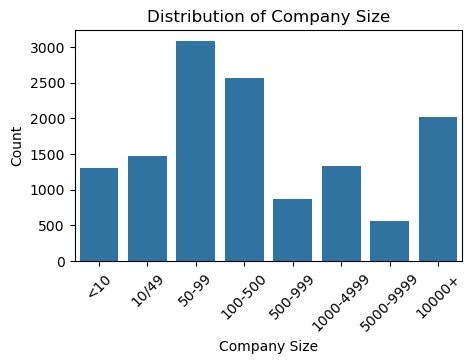

In [7]:
# Define the correct order for company sizes, including NaN
company_size_order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']

# Count occurrences of each company size, including NaN
df_job['company_size'] = df_job['company_size'].astype(str)  # Convert NaN to string for counting
company_size_counts = df_job['company_size'].value_counts()

# Reindex based on the predefined order
df_ordered = pd.Series(company_size_counts, index=company_size_order).fillna(0)

# Plot the distribution
plt.figure(figsize=(5,3))
sns.barplot(x=df_ordered.index, y=df_ordered.values)
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.title("Distribution of Company Size")
plt.xticks(rotation=45)
plt.show()

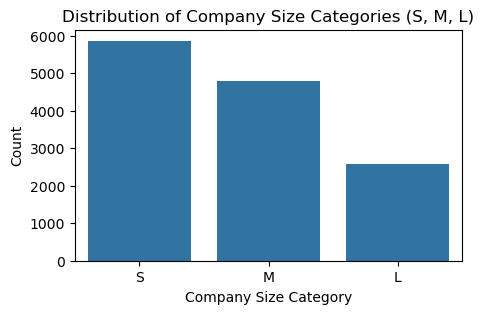

In [8]:
# Define mapping for company size categories
size_mapping = {
    '<10': 'S',
    '10/49': 'S',
    '50-99': 'S',
    '100-500': 'M',
    '500-999': 'M',
    '1000-4999': 'M',
    '5000-9999': 'L',
    '10000+': 'L',
    'NaN': 'Unknown'
}

# Convert company_size to categories
df_job['company_size'] = df_job['company_size'].astype(str).map(size_mapping)

# Count occurrences of each category
company_size_counts = df_job['company_size'].value_counts()

# Plot the distribution
plt.figure(figsize=(5,3))
sns.barplot(x=company_size_counts.index, y=company_size_counts.values)
plt.xlabel("Company Size Category")
plt.ylabel("Count")
plt.title("Distribution of Company Size Categories (S, M, L)")
plt.xticks(rotation=0)
plt.show()

In [9]:
# Count NaN values in company_size column
nan_count = df_job['company_size'].isna().sum()
total_rows = len(df_job)
nan_percentage = (nan_count / total_rows) * 100

print(f"Number of rows with NaN in company_size: {nan_count}")
print(f"Percentage of NaN values compared to total rows: {nan_percentage:.2f}%")

Number of rows with NaN in company_size: 5938
Percentage of NaN values compared to total rows: 30.99%


In [10]:
# Count total rows
total_rows = len(df_job)

# Count rows that contain at least one NaN value
rows_with_nan = df_job.isna().any(axis=1).sum()

# Calculate percentage
nan_percentage = (rows_with_nan / total_rows) * 100

# Print results
print(f"Total rows: {total_rows}")
print(f"Rows with at least one NaN: {rows_with_nan}")
print(f"Percentage of rows containing NaN values: {nan_percentage:.2f}%")

Total rows: 19158
Rows with at least one NaN: 8553
Percentage of rows containing NaN values: 44.64%


###### city_development_index:

In [11]:
# Create a mapping of city -> city_development_index using known values
city_dev_index_mapping = df_job.groupby("city")["city_development_index"].first().to_dict()

# Fill missing city_development_index using the mapping
df_job["city_development_index"] = df_job["city"].map(city_dev_index_mapping)

# Verify if there are still missing values in city_development_index
missing_city_dev_index = df_job["city_development_index"].isna().sum()

# Display the number of remaining missing values
print(f"Number of rows with missing city_development_index after mapping: {missing_city_dev_index}")

Number of rows with missing city_development_index after mapping: 0


In [12]:
df_job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

##### major_discipline:

In [13]:
df_job.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

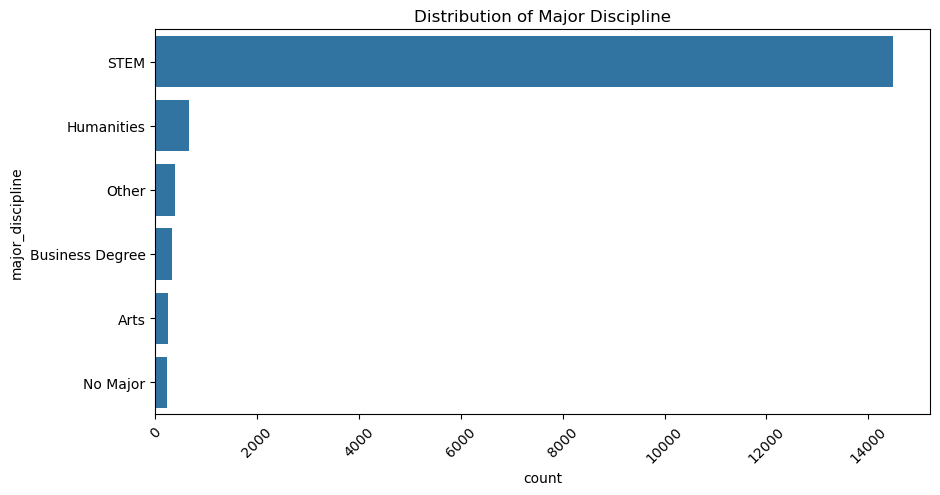

In [14]:
# Drop Nan Rows of major_discipline
df_job_major = df_job.dropna(subset=['major_discipline'])
# plot the distribution of major_discipline
plt.figure(figsize=(10,5))
sns.countplot(data=df_job_major, y ='major_discipline', order=df_job_major['major_discipline'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Major Discipline')
plt.show()

##### training_hours:

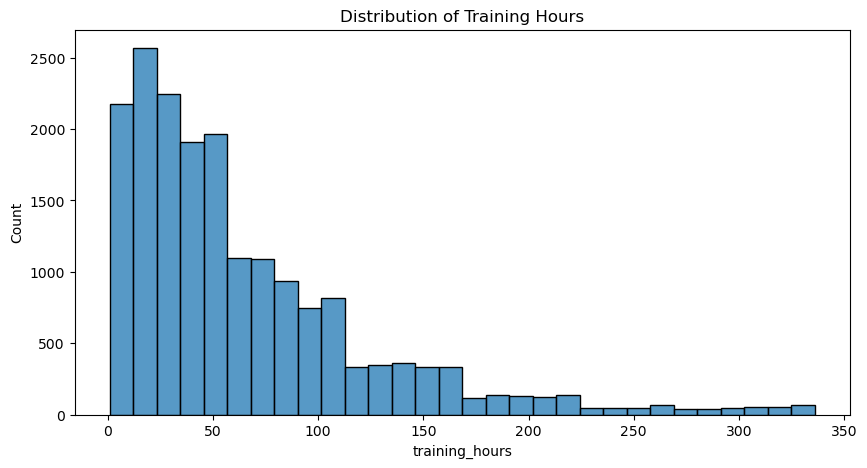

In [15]:
# Drop NAN rows of training_hours
df_job_training = df_job.dropna(subset=['training_hours'])
# plot the distribution of training_hours
plt.figure(figsize=(10,5))
sns.histplot(data=df_job_training, x='training_hours', bins=30)
plt.title('Distribution of Training Hours')
plt.show()

##### education_level:

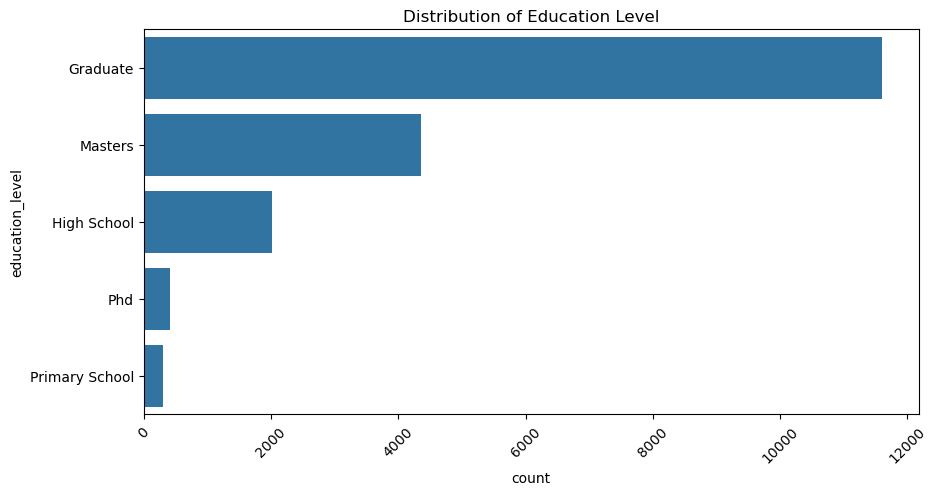

In [16]:
# Drop NAN rows of education_level
df_job_education = df_job.dropna(subset=['education_level'])
# plot the distribution of education_level
plt.figure(figsize=(10,5))
sns.countplot(data=df_job_education, y='education_level', order=df_job_education['education_level'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Education Level')
plt.show()

In [17]:
# Check the major disipline of  primary school graduates
df_job_primary = df_job[df_job['education_level'] == 'Primary School']
print("The number of primary school graduate : ",df_job_primary['major_discipline'].size)
print("The number of Nan values of the major discipline of primary students : ",df_job_primary['major_discipline'].isna().sum())

The number of primary school graduate :  308
The number of Nan values of the major discipline of primary students :  308


 Since Primary school is not really relevant for our analyis and we dont have many data points for it we can drop it.
 The fact that the major discipline is missing for primary school graduates is also not relevant for our analysis.

### City Development Index VS Company Type

/Users/zainebtafasca/opt/miniconda3/envs/adaexam/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


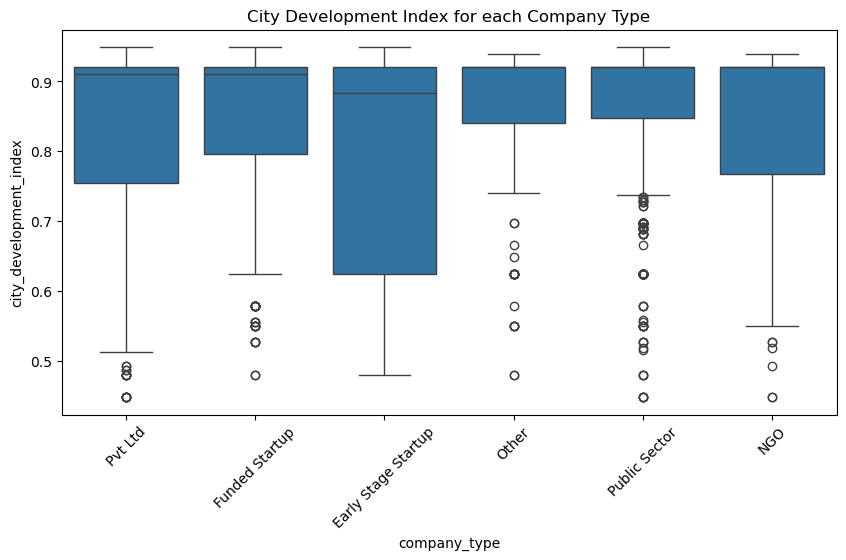

In [18]:
# Visualize the distribution of city_development_index for each company type
plt.figure(figsize=(10,5))
sns.boxplot(data=df_job, x='company_type', y='city_development_index')  
plt.xticks(rotation=45)
plt.title('City Development Index for each Company Type')
plt.show()


### Experience VS Company size

/Users/zainebtafasca/opt/miniconda3/envs/adaexam/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zainebtafasca/opt/miniconda3/envs/adaexam/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


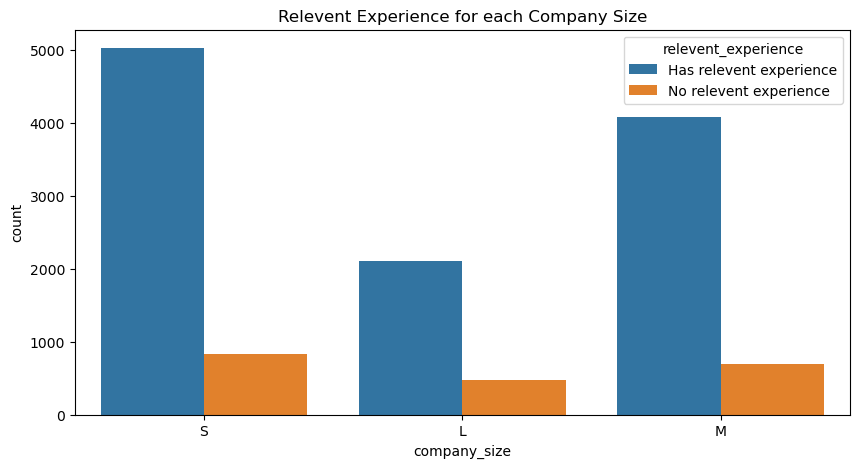

In [19]:
# Plot the number of relevent, none relevant for each company size
plt.figure(figsize=(10,5))
sns.countplot(data=df_job, x='company_size', hue='relevent_experience')
plt.title('Relevent Experience for each Company Size')
plt.show()

### Job seeking VS Education Level

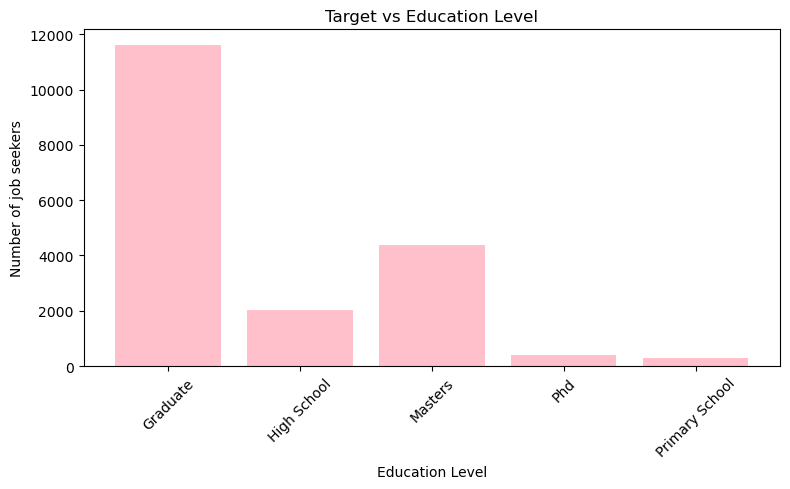

In [20]:
# Group by 'education_level' and calculate the mean target value
grouped_education = df_job.groupby("education_level")["target"].count().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(grouped_education["education_level"], grouped_education["target"], color='pink')
plt.xlabel("Education Level")
plt.ylabel("Number of job seekers")
plt.title("Target vs Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
df_job

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,S,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,Not specified,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,Not specified,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,S,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,S,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,M,Pvt Ltd,97.0,0.0


In [27]:
bins_4 = [0, 50, 100, 200, 350]
labels_4 = ['0-50', '51-100', '101-200', '201-350']

# Creating the new column using pd.cut with the 4 categories
df_job['training_hours_range'] = pd.cut(df_job['training_hours'], bins=bins_4, labels=labels_4, include_lowest=True)

# Displaying the updated dataframe
print(df_job.head())

   enrollee_id      city  city_development_index         gender  \
0         8949  city_103                   0.920           Male   
1        29725   city_40                   0.776           Male   
2        11561   city_21                   0.624  Not specified   
3        33241  city_115                   0.789  Not specified   
4          666  city_162                   0.767           Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type  training_hours  \
0             STEM        20.0          NaN             NaN            36.0   
1             STEM        15.0            

In [29]:
#df_job.to_csv('data_science_job_cleaned.csv', index=False)

In [31]:
df_job.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target', 'training_hours_range'],
      dtype='object')